In [1]:
import numpy as np
from astropy.coordinates import Angle
from astropy.io import fits
from astropy import units as u 
from ants import absInt, fluxInt, headPlay, fitsPlay #radiobs modules

import pyregion
import aplpy

from matplotlib import pyplot as plt
from matplotlib import rc
from matplotlib import gridspec
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, LogLocator
from matplotlib import transforms as mtransforms
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
from matplotlib.colors import SymLogNorm


fl = fluxInt.fluxint()
hp = headPlay.headplay()
fp = fitsPlay.fitsplay()


get_ipython().magic(u'pylab inline')


home = '/Users/'
#home = '/home/'


rootDir = home+'maccagni/Projects/MFS/FornaxA/centreHI/'
pvDir = rootDir+'pvPlots/'
plotDir = home+'maccagni/Projects/MFS/FornaxA/centreHI/plots/pvPlots/'


print('''\n\t+---------+\n\t Inputs loaded\n\t+---------+''')




/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Populating the interactive namespace from numpy and matplotlib

	+---------+
	 Inputs loaded
	+---------+


/Users/maccagni/programs/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['rc']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
#----------------------#
# rc param initialize
#----------------------#
params = {'figure.figsize'      : '10,10',
          'font.family'         :' serif',
          'font.serif'          :'times',
          'font.style'          : 'normal',
          'font.weight'         : 'book',
          'font.size'           : 24,
          'axes.linewidth'      : 2,
          'lines.linewidth'     : 3,
          'xtick.labelsize'     : 22,
          'ytick.labelsize'     : 22, 
          'xtick.direction'     :'in',
          'ytick.direction'     :'in',
          'xtick.major.size'    : 6,
          'xtick.major.width'   : 2,
          'xtick.minor.size'    : 3,
          'xtick.minor.width'   : 1,
          'ytick.major.size'    : 6,
          'ytick.major.width'   : 2,
          'ytick.minor.size'    : 3,
          'ytick.minor.width'   : 1, 
          'text.usetex'         : True,
          'text.latex.unicode'  : True
           }
plt.rcParams.update(params)

print '''\n\t+---------+\n\t Matplotlib initialized\n\t+---------+'''


	+---------+
	 Matplotlib initialized
	+---------+


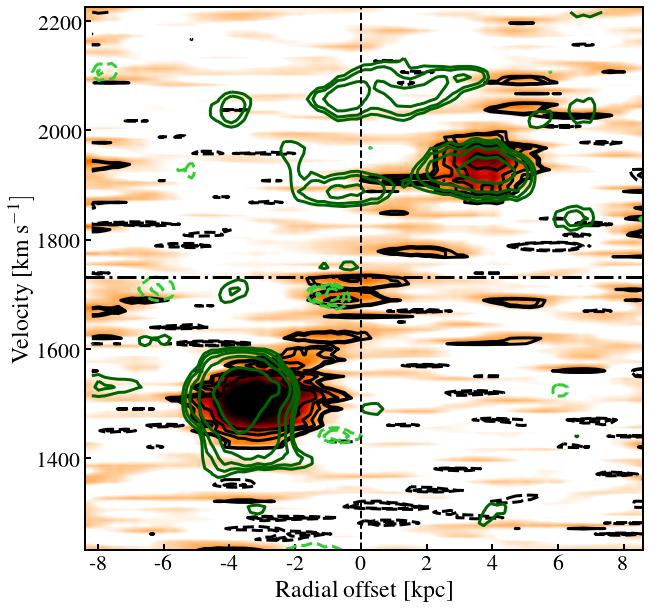

In [12]:
outPlot = plotDir+'PV_Overlay_jetAxis1.pdf'
imageName = pvDir+'PV_CO_vrad_cv_regXY_final_jetAxis.fits'
imageNameHI = pvDir+'PV_FA_centreCut_rg_jetAxis.fits'


ymin=20
ymax=120
xmin=2
xmax=86

yminHI=20
ymaxHI=55
xminHI=20
xmaxHI=134

vsys = 1732.
shift_x=0
ext_ymin = -1
ext_ymax = ymax - ymin + ext_ymin

ext_xmin = -1
ext_xmax = xmax - xmin + ext_xmin 

f11 = fits.getdata(imageNameHI, ext=0)


f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

fig, ax1 = plt.subplots()

img = plt.imshow(f22[ymin:ymax,xmin:xmax], cmap='gist_heat_r',interpolation='bilinear',
                aspect='auto',vmin=-2e-3,vmax=0.2)

val_plus= [3.0e-2,3.6e-2,6e-2,8.4e-2,1.2e-1,2.4e-1]
val_minus= [-3.6e-2,-3.0e-2]
cset = contour(f22[ymin:ymax,xmin:xmax],val_plus,origin='lower', aspect='auto',
               colors='black')
cset = contour(f22[ymin:ymax,xmin:xmax],val_minus,origin='lower', aspect='auto',
               colors='black',ls='--')

ax1.set_ylabel(r'Velocity [km s$^{-1}]$')
ax1.set_xlabel(r'Radial offset [kpc]')

rad_off = (np.linspace(1, f22.shape[1], f22.shape[1]) - h22['CRPIX1']) *h22['CDELT1'] + h22['CRVAL1']
rad_off = rad_off*3600.*101./1e3
x2 = rad_off[xmax]
x1 = rad_off[xmin]
y2 = ext_xmax
y1 = ext_xmin
m_rad = (y2-y1)/(x2-x1)
b_rad = m_rad*(-x1) + y1 +shift_x
#vertical line
x_zero = m_rad*.0 + b_rad 
ax1.axvline(x=x_zero,color='black',lw=2,ls='--')
#xticks 
xticks_in = [-8,-6,-4,-2,0,2,4,6,8]
xticks_in_name = np.array(xticks_in,dtype=str)
xticks=[]
for i in xrange(0,len(xticks_in)):
    xticks.append(m_rad*xticks_in[i]+ b_rad )
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_in_name)

vel = ((np.linspace(1, f22.shape[0], f22.shape[0]) - h22['CRPIX2']) * h22['CDELT2'] + h22['CRVAL2']) / 1e3
x2 = vel[ymax]
x1 = vel[ymin]
y2 = ext_ymax
y1 = ext_ymin
m_vel = (y2-y1)/(x2-x1)
b_vel = m_vel*(-x1) + y1
y_vsys = m_vel*vsys + b_vel 
ax1.axhline(y=y_vsys,color='black',ls='-.')
yticks=[]
yticks_in = [1400,1600,1800,2000,2200]
yticks_in_name = ['1400','1600','1800','2000','2200']
for i in xrange(0,len(yticks_in)):
    yticks.append(m_vel*yticks_in[i]+ b_vel)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks_in_name)

val_pv = [0.2e-3,0.24e-3,0.3e-3,0.4e-3,0.64e-3,8.e-2]
val_pv_neg = [-8e-2,-0.64e-3,-0.4e-3,-0.3e-3,-0.24e-3,-0.2e-3]

cset = contour(f11[ymin:ymax,xmin:xmax],val_pv,origin='lower', aspect='auto',colors='darkgreen')
cset = contour(f11[ymin:ymax,xmin:xmax],val_pv_neg,origin='lower', aspect='auto',colors='limegreen',ls='--')

fig.savefig(outPlot,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


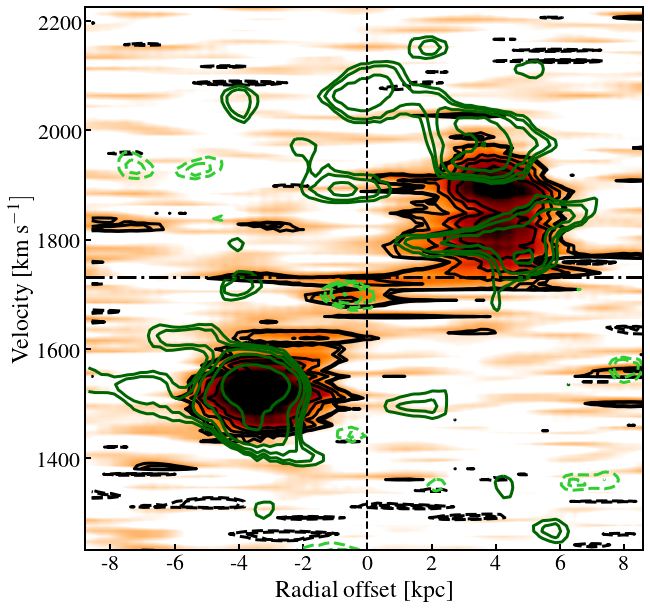

In [10]:
outPlot = plotDir+'PV_Overlay_majAxis1.pdf'
imageName = pvDir+'PV_CO_vrad_cv_regXY_final_majAxis.mir.fits'
imageNameHI = pvDir+'PV_FA_centreCut_majAxis_reg.fits'


ymin=20
ymax=120
xmin=0
xmax=86


vsys = 1732.

ext_ymin = -1
ext_ymax = ymax - ymin + ext_ymin

ext_xmin = -1
ext_xmax = xmax - xmin + ext_xmin 

f11 = fits.getdata(imageNameHI, ext=0)


f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

fig, ax1 = plt.subplots()

img = plt.imshow(f22[ymin:ymax,xmin:xmax], cmap='gist_heat_r',interpolation='bilinear',
                aspect='auto',vmin=-2e-3,vmax=0.2)

val_plus= [3.0e-2,3.6e-2,6e-2,8.4e-2,1.2e-1,2.4e-1]
val_minus= [-3.6e-2,-3.0e-2]
cset = contour(f22[ymin:ymax,xmin:xmax],val_plus,origin='lower', aspect='auto',
               colors='black')
cset = contour(f22[ymin:ymax,xmin:xmax],val_minus,origin='lower', aspect='auto',
               colors='black',ls='--')

ax1.set_ylabel(r'Velocity [km s$^{-1}]$')
ax1.set_xlabel(r'Radial offset [kpc]')

rad_off = (np.linspace(1, f22.shape[1], f22.shape[1]) - h22['CRPIX1']) *h22['CDELT1'] + h22['CRVAL1']
rad_off = rad_off*3600.*101./1e3
x2 = rad_off[xmax]
x1 = rad_off[xmin]
y2 = ext_xmax
y1 = ext_xmin
m_rad = (y2-y1)/(x2-x1)
b_rad = m_rad*(-x1) + y1 +shift_x
#vertical line
x_zero = m_rad*.0 + b_rad 
ax1.axvline(x=x_zero,color='black',lw=2,ls='--')
#xticks 
xticks_in = [-8,-6,-4,-2,0,2,4,6,8]
xticks_in_name = np.array(xticks_in,dtype=str)
xticks=[]
for i in xrange(0,len(xticks_in)):
    xticks.append(m_rad*xticks_in[i]+ b_rad )
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_in_name)

vel = ((np.linspace(1, f22.shape[0], f22.shape[0]) - h22['CRPIX2']) * h22['CDELT2'] + h22['CRVAL2']) / 1e3
x2 = vel[ymax]
x1 = vel[ymin]
y2 = ext_ymax
y1 = ext_ymin
m_vel = (y2-y1)/(x2-x1)
b_vel = m_vel*(-x1) + y1
y_vsys = m_vel*vsys + b_vel 
ax1.axhline(y=y_vsys,color='black',ls='-.')
yticks=[]
yticks_in = [1400,1600,1800,2000,2200]
yticks_in_name = ['1400','1600','1800','2000','2200']
for i in xrange(0,len(yticks_in)):
    yticks.append(m_vel*yticks_in[i]+ b_vel)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks_in_name)

val_pv = [0.2e-3,0.24e-3,0.3e-3,0.4e-3,0.64e-3,8.e-2]

cset = contour(f11[ymin:ymax,xmin:xmax],val_pv,colors='darkgreen')
val_pv_neg = [-8e-2,-0.64e-3,-0.4e-3,-0.3e-3,-0.24e-3,-.2e-3]

cset = contour(f11[ymin:ymax,xmin:xmax],val_pv_neg,origin='lower', aspect='auto',colors='limegreen',ls='--')

fig.savefig(outPlot,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)


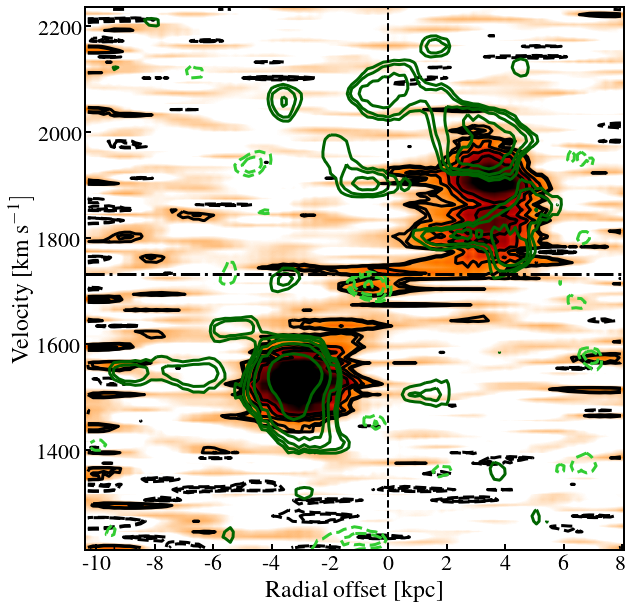

In [28]:
outPlot = plotDir+'PV_Overlay_Ccut1.pdf'
imageName = pvDir+'PV_CO_vrad_cv_regXY_final_Ccut.fits'
imageNameHI = pvDir+'PV_FA_centreCut_Ccut_reg.fits'


ymin=0
ymax=103
xmin=5
xmax=107



vsys = 1732.

ext_ymin = 0
ext_ymax = ymax - ymin + ext_ymin

ext_xmin = +1
ext_xmax = xmaxHI - xminHI + ext_xmin 

f11 = fits.getdata(imageNameHI, ext=0)
h11 = fits.getheader(imageNameHI, ext=0)


f22 = fits.getdata(imageName, ext=0)
h22 = fits.getheader(imageName, ext=0)

fig, ax1 = plt.subplots()

img = plt.imshow(f22[ymin:ymax,xmin:xmax], cmap='gist_heat_r',interpolation='bilinear',
                vmin=-2e-3,vmax=0.2)

val_plus= [3.0e-2,3.6e-2,6e-2,8.4e-2,1.2e-1,2.4e-1]
val_minus= [-3.6e-2,-3.0e-2]
cset = contour(f22[ymin:ymax,xmin:xmax],val_plus,
               colors='black')
cset = contour(f22[ymin:ymax,xmin:xmax],val_minus,
               colors='black',ls='--')

ax1.set_ylabel(r'Velocity [km s$^{-1}]$')
ax1.set_xlabel(r'Radial offset [kpc]')

rad_off = (np.linspace(1, f11.shape[1], f11.shape[1]) - h11['CRPIX1']) *h11['CDELT1'] + h11['CRVAL1']
rad_off = rad_off*3600.*101./1e3+1.
x2 = rad_off[xmax]
x1 = rad_off[xmin]
y2 = ext_xmax
y1 = ext_xmin
m_rad = (y2-y1)/(x2-x1)
b_rad = m_rad*(-x1) + y1 +shift_x
#vertical line
x_zero = m_rad*.0 + b_rad 
ax1.axvline(x=x_zero,color='black',lw=2,ls='--')
#xticks 
xticks_in = [-12,-10,-8,-6,-4,-2,0,2,4,6,8]
xticks_in_name = np.array(xticks_in,dtype=str)
xticks=[]
for i in xrange(0,len(xticks_in)):
    xticks.append(m_rad*xticks_in[i]+ b_rad )
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks_in_name)

vel = ((np.linspace(1, f22.shape[0], f22.shape[0]) - h22['CRPIX2']) * h22['CDELT2'] + h22['CRVAL2']) / 1e3
x2 = vel[ymax]
x1 = vel[ymin]
y2 = ext_ymax
y1 = ext_ymin
m_vel = (y2-y1)/(x2-x1)
b_vel = m_vel*(-x1) + y1
y_vsys = m_vel*vsys + b_vel 
ax1.axhline(y=y_vsys,color='black',ls='-.')
yticks=[]
yticks_in = [1400,1600,1800,2000,2200]
yticks_in_name = ['1400','1600','1800','2000','2200']
for i in xrange(0,len(yticks_in)):
    yticks.append(m_vel*yticks_in[i]+ b_vel)
ax1.set_yticks(yticks)
ax1.set_yticklabels(yticks_in_name)

val_pv = [0.2e-3,0.24e-3,0.3e-3,0.4e-3,0.64e-3,8.e-2]

cset = contour(f11[ymin:ymax,xmin:xmax],val_pv,colors='darkgreen')

val_pv_neg = [-8e-2,-0.64e-3,-0.4e-3,-0.3e-3,-0.24e-3,-0.2e-3]

cset = contour(f11[ymin:ymax,xmin:xmax],val_pv_neg,origin='lower', aspect='auto',colors='limegreen',ls='--')
fig.savefig(outPlot,format='pdf',dpi=300,bbox_inches='tight',transparent=False,overwrite=True)
